In [2]:
import os 
import sys
import json
import cv2
import matplotlib.pyplot as plt
import pandas as pd

# Loading Data 

In [3]:
class House: 
  def __init__(self, address, postal_code, type, real_price, 
                size, basement_size, rooms, year_built, 
                year_renovated, energy_label, image_floorplan): 
    
    #Textual Data 
    self.address = address  
    self.postal_code = postal_code
    self.type = type
    self.price = real_price
    self.size = size
    self.basement_size = basement_size
    self.rooms = rooms
    self.year_built = year_built
    self.year_renovated = year_renovated
    self.energy_label = energy_label

    #Image Data 
    self.image_floorplan = image_floorplan
    
    #Predictions 
    self.predicted_price = None


def load_jpg_and_json(folder_path:str) -> (dict, cv2):
  files = os.listdir(folder_path)
  jpg_file = None
  json_file = None
  # Find the jpg and json file in the folder
  for filename in files:
    if filename.endswith(".jpg"):
      jpg_file = os.path.join(folder_path, filename)
    elif filename.endswith(".json"):
      json_file = os.path.join(folder_path, filename)
  
  # Load the jpg and json file
  if jpg_file:
    image_data = cv2.imread(jpg_file)  
  else:
    image_data = None
  if json_file:
    with open(json_file, "r") as f:
      json_data = json.load(f) 

  return json_data, image_data

def create_house_instance(json_data, jpg): 
  address = json_data["address"]
  postal_code = json_data["postal_code"]
  type = json_data["type"]
  price = json_data["price"]
  size = json_data["size"]
  basement_size = json_data["basement_size"]
  rooms = json_data["rooms"]
  year_built = json_data["year_built"]
  year_renovated = json_data["year_renovated"] if json_data["year_renovated"] else None
  energy_label = json_data["energy_label"]
  image_floorplan = jpg

  house = House(address, postal_code, type, price, 
                size, basement_size, rooms, year_built, 
                year_renovated, energy_label, image_floorplan)
  return house

def load_houses(folder_path:str):
  houses = []
  for folder in os.listdir(folder_path):
    json_data, jpg = load_jpg_and_json(os.path.join(folder_path, folder))
    house = create_house_instance(json_data, jpg)
    houses.append(house)
  return houses

#If we want to work with a DF 
def data_to_DF(houses: list[House])-> pd.DataFrame:
  data = []
  for house in houses:
    data.append([house.address, house.postal_code, house.type, house.price, 
                house.size, house.basement_size, house.rooms, house.year_built, 
                house.year_renovated, house.energy_label, house.image_floorplan])
  df = pd.DataFrame(data, columns = ["address", "postal_code", "type", "price", 
                "size", "basement_size", "rooms", "year_built", 
                "year_renovated", "energy_label", "image_floorplan"])
  return df

,address,postal_code,type,price,size,basement_size,rooms,year_built,year_renovated,energy_label,image_floorplan
0,Harevej 3 7000 Fredericia,7000,villa,1695000,109,30.0,4,1952,1999.0,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Kirkevej 265 Tolne 9870 Sindal,9870,villa,375000,100,0.0,2,1925,NaN,F,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Ledavej 12 8960 Randers SØ,8960,rækkehus,2198000,141,0.0,4,2008,NaN,B,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Olfert Fischers Vej 4 9900 Frederikshavn,9900,villa,895000,114,0.0,5,1960,1969.0,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Borgmestervej 16 8700 Horsens,8700,villa,1195000,152,65.0,4,1933,1980.0,G,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


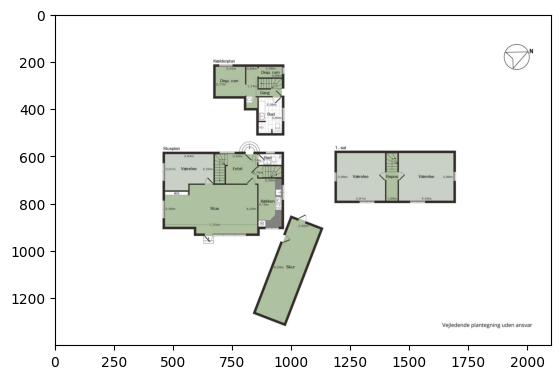

In [4]:
path = "../nybolig-scrape/output"
houses = load_houses(path)
houses_df = data_to_DF(houses)
display(houses_df.head())

plt.imshow(houses[0].image_floorplan)